In [43]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.cluster import KMeans
from PIL import Image




index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv',encoding='utf-8', names=index, header=None)

In [44]:
# функция для нахождения самого близкого цвета
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

In [45]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [46]:
def palette(clusters):
    width=140
    palette = np.zeros((30, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

In [47]:
def final(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    clt = KMeans(n_clusters=5)
    clt.fit(img.reshape(-1,3))
    a=clt.cluster_centers_
    for i,j,x in a: #алгоритм выыодит названия самых частых цветов!!!!!
        a=(get_color_name(i,j,x))
        print(a)
    clt_1 = clt.fit(img.reshape(-1, 3))
    show_img_compar(img, palette(clt_1))


Железный 
Коричнево-Бежевый 
Каменый серый 
Черный 
Серо-Бежевый 


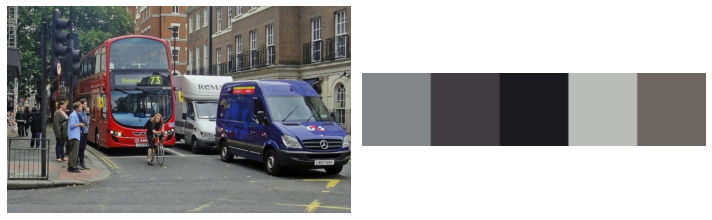

In [48]:
final('bus.jpeg')